# Music Genre Classification

Our Datasets contains 10 genres:-
- Blues
- Classical
- Country
- Disco
- Hiphop
- Jazz
- Metal
- Pop
- Reggae
- Rock


# Reading & Understanding Data
## Importing Libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
import librosa.display
seed = 12
np.random.seed(seed)

### Loading Dataset

In [184]:
df = pd.read_csv(r'C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\First_part\features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

### Exploring the dataset

In [185]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


index  label
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997

# Data Visualization

In [186]:
audio_fp = r'C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\First_part\genres_combined\blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

In [187]:
# play sample file
IPython.display.Audio(audio_data, rate=sr)

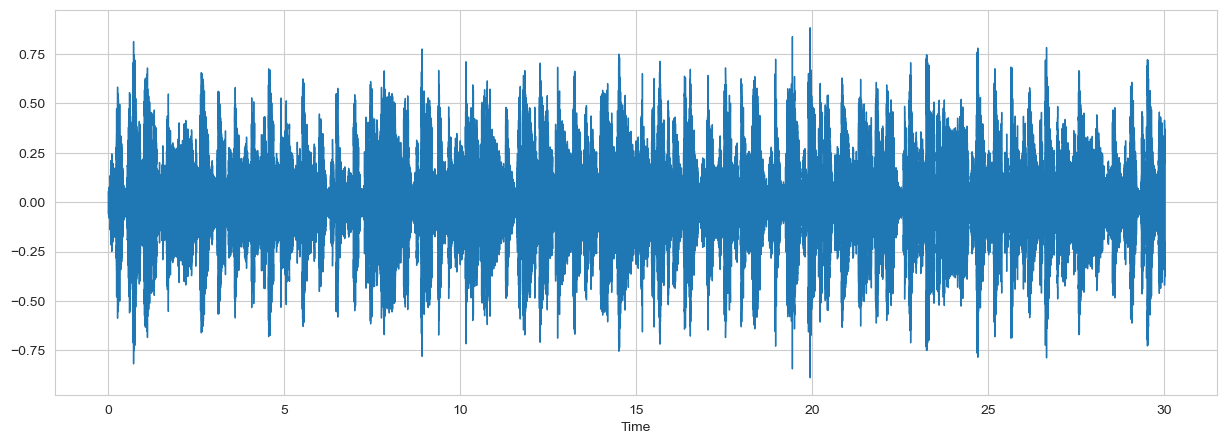

In [188]:
plt.figure(figsize=(15, 5))
lplt.waveshow(audio_data, sr=sr)
plt.show()


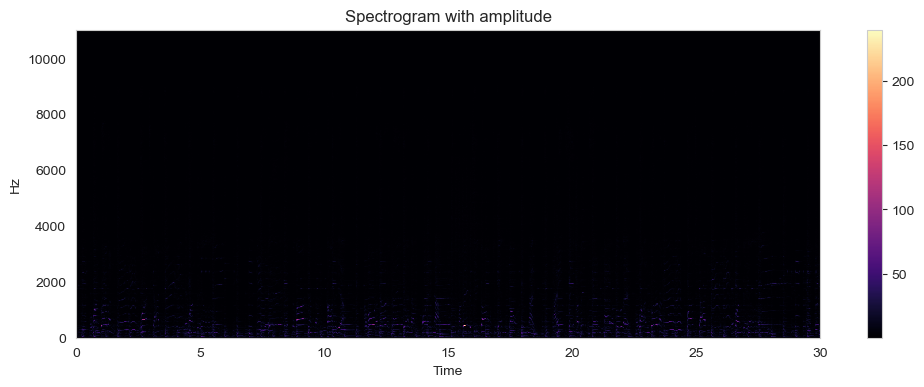

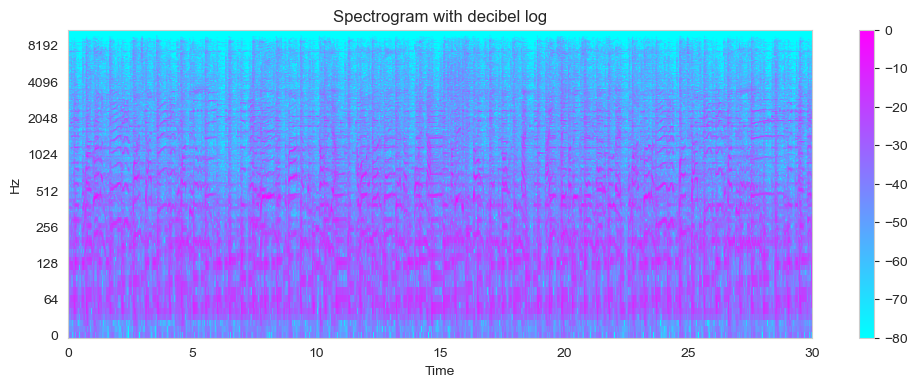

In [189]:
# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

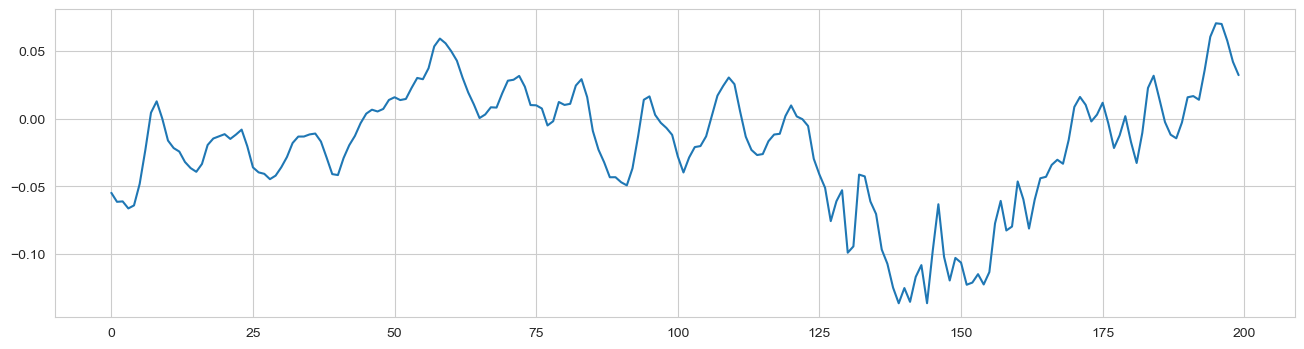

In [190]:
# plot zoomed audio wave 
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()

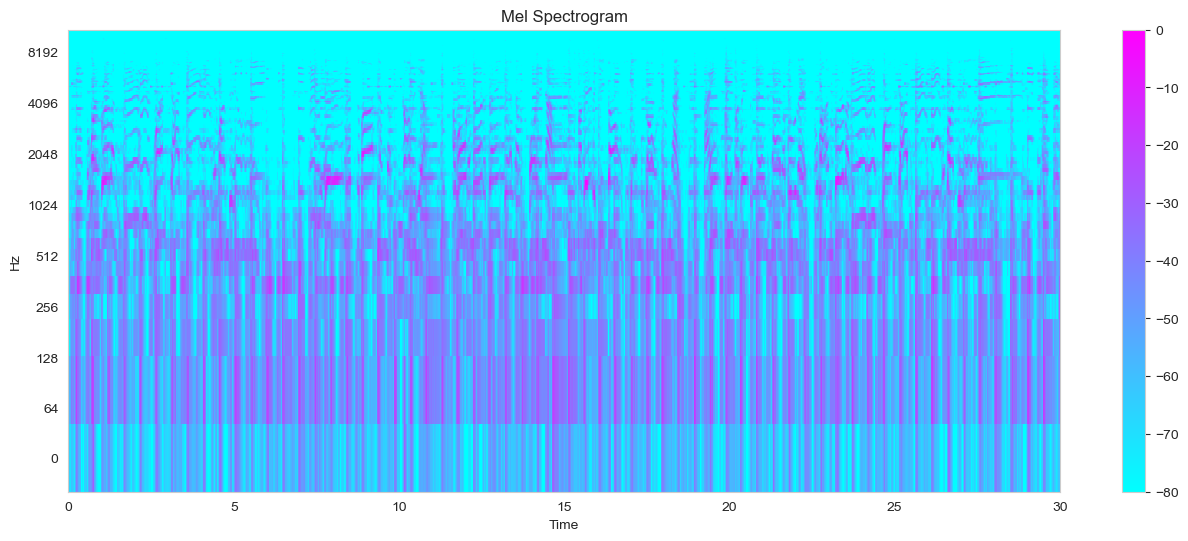

In [191]:
hop_length = 512
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(S=mel_spec, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

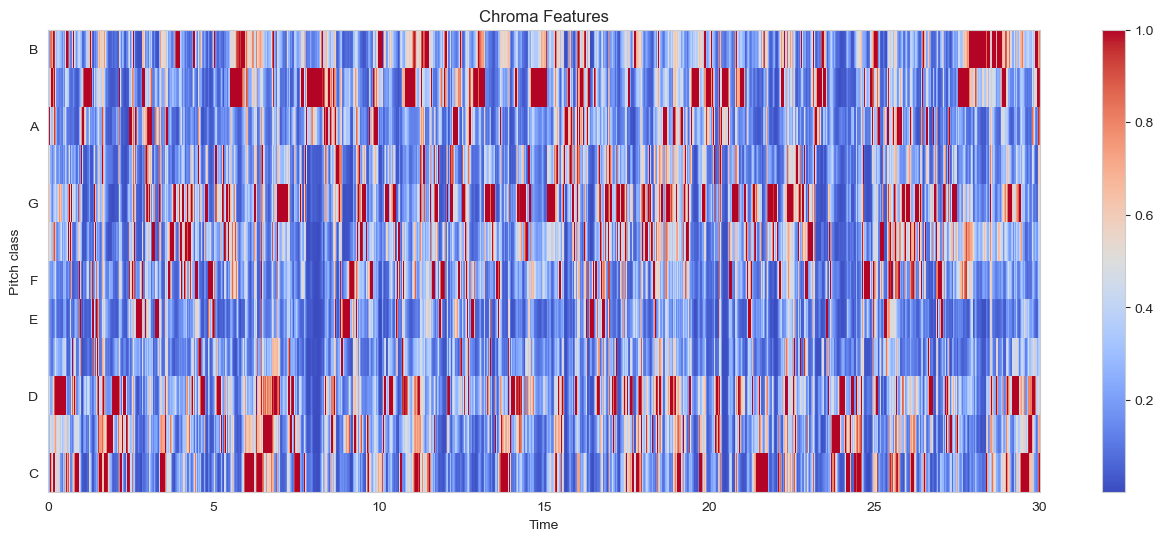

In [192]:
# Compute the Chroma feature matrix
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
plt.figure(figsize=(16, 6))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

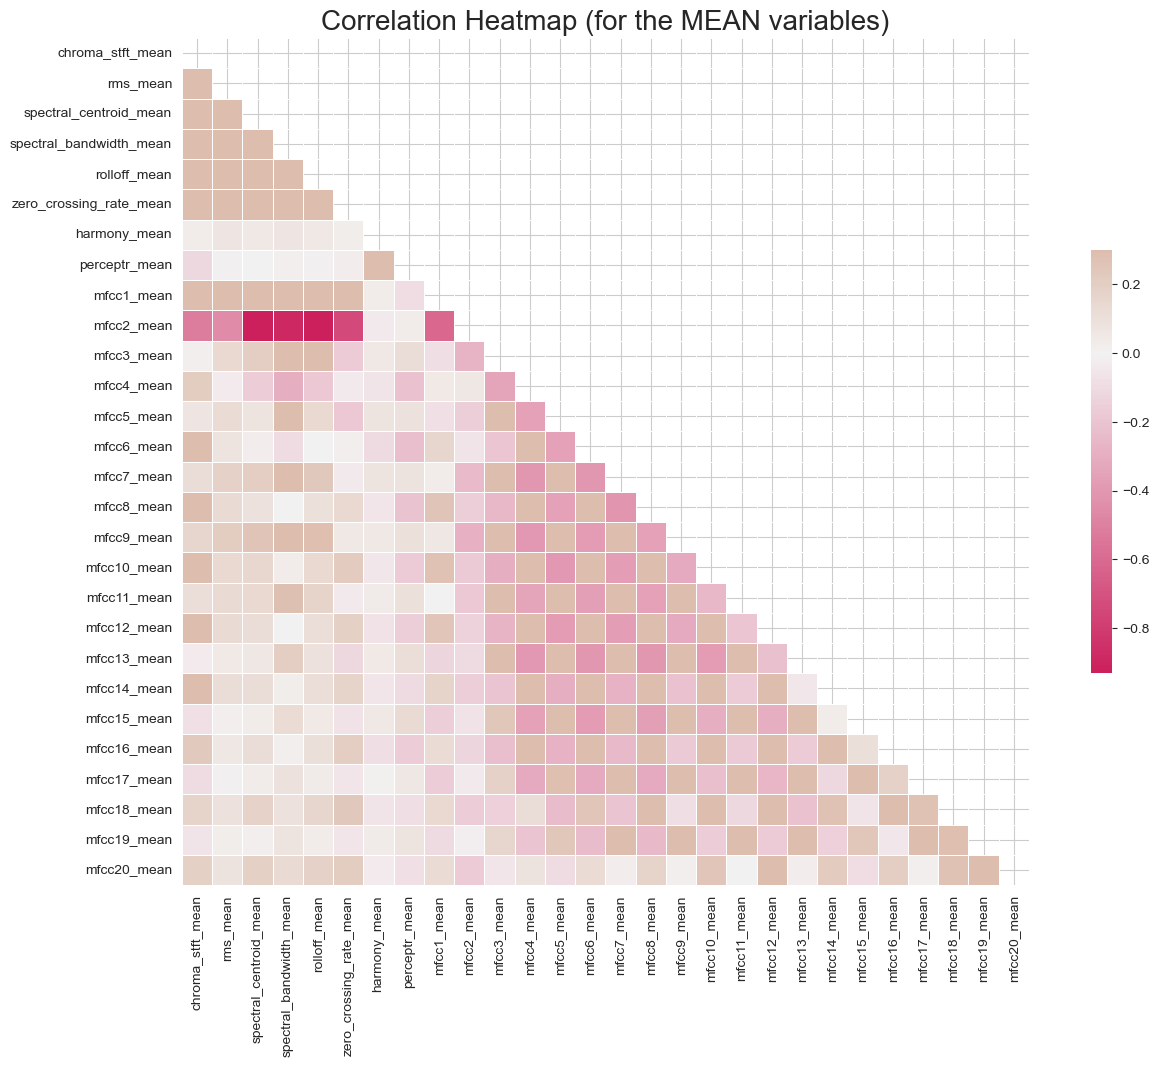

In [193]:
# Computing the Correlation Matrix


spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(16, 11))
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("Corr_Heatmap.png")

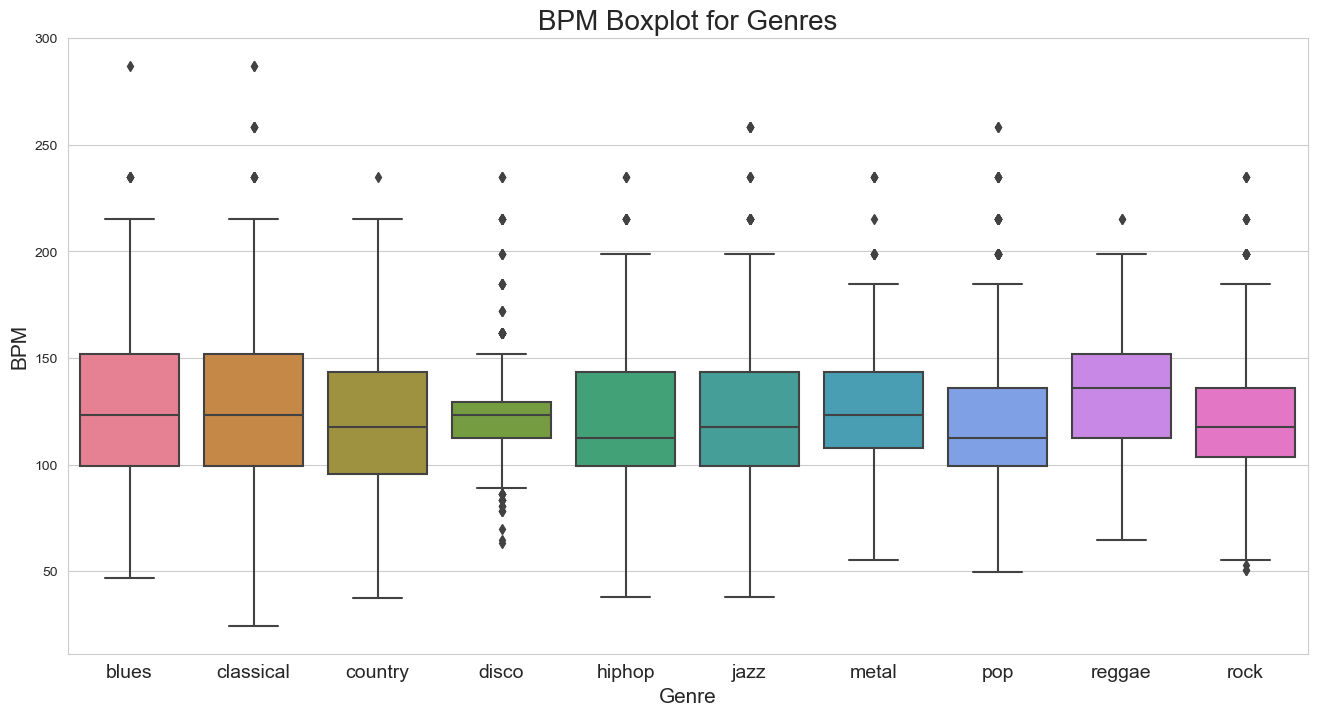

In [194]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

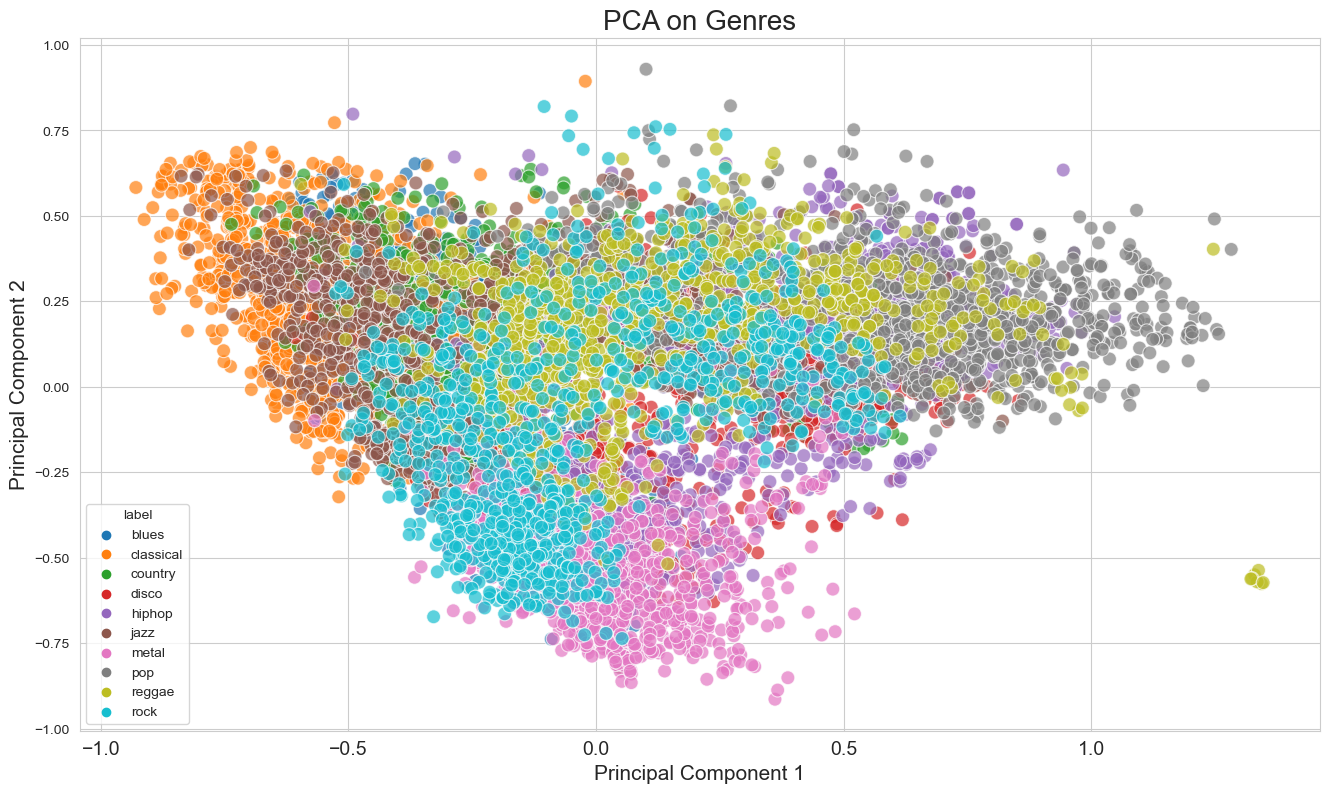

In [195]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

# Data Preparation

- Treat missing values.
- Outlier Treatment
- Define dummy variables for categorical variables.

## Missing Value Treatment

In [196]:
# find all columns with any NA values
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


`No null values in the dataset`



`There are no categorical variable as such. Hence, Dummy variable creation is not needed.`

## Encode Genre Label

In [197]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [198]:
# update labels in df to index
df.label = [label_index[l] for l in df.label]

# Split Train, Dev & Test Sets

In [199]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [200]:
# remove irrelevant columns
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [201]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 6993 records out of 9990 which is 70%
Dev set has 1978 records out of 9990 which is 20%
Test set has 1019 records out of 9990 which is 10%


In [202]:
print(y_train.value_counts()[0]/y_train.shape[0]*100)
print(y_dev.value_counts()[0]/y_dev.shape[0]*100)
print(y_test.value_counts()[0]/y_test.shape[0]*100)

10.01001001001001
10.010111223458038
10.009813542688912


## Scale the Features

In [203]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Model Building

In [42]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)


TF version:- 2.15.0


In [43]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()


In [44]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14848     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 56650 (221.29 KB)
Trainable params: 56650 (221.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Epoch 1/70


55/55 [==============================] - 2s 11ms/step - loss: 1.4864 - accuracy: 0.4862 - val_loss: 1.0715 - val_accuracy: 0.6153


Max. Validation Accuracy 0.9029322266578674


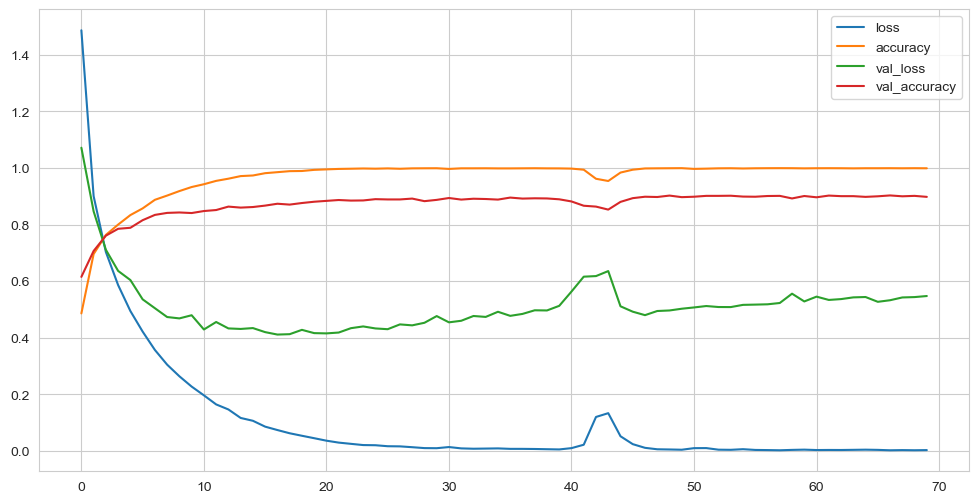

In [45]:
plotHistory(model_1_history)

In [46]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

Max. Validation Accuracy 0.926188051700592


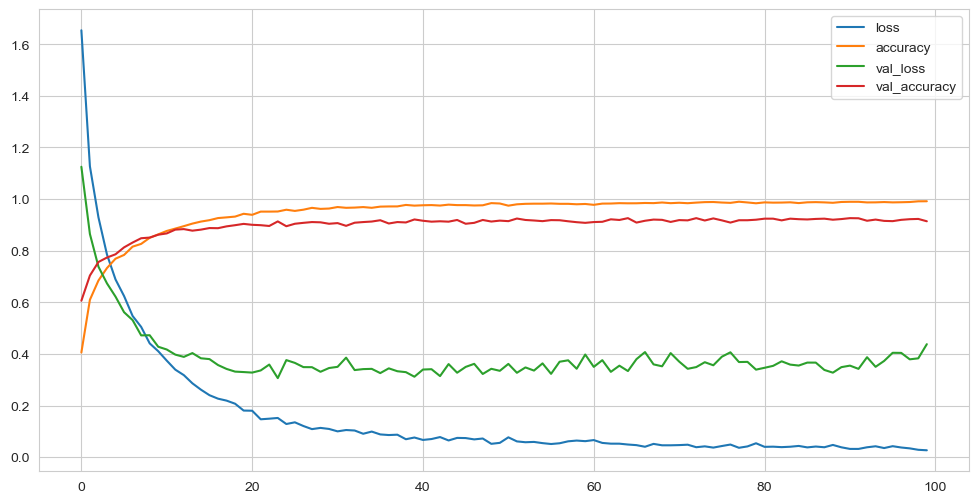

In [47]:
plotHistory(model_2_history)

In [48]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=700, optimizer='sgd')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               29696     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)               

Epoch 105/700
55/55 [==============================] - 0s 9ms/step - loss: 0.5800 - accuracy: 0.8084 - val_loss: 0.5452 - val_accuracy: 0.8170
Epoch 106/700
55/55 [==============================] - 0s 8ms/step - loss: 0.5824 - accuracy: 0.8034 - val_loss: 0.5413 - val_accuracy: 0.8205
Epoch 107/700
55/55 [==============================] - 0s 8ms/step - loss: 0.5749 - accuracy: 0.8044 - val_loss: 0.5406 - val_accuracy: 0.8195
Epoch 108/700
55/55 [==============================] - 0s 8ms/step - loss: 0.5690 - accuracy: 0.8088 - val_loss: 0.5361 - val_accuracy: 0.8210
Epoch 109/700
55/55 [==============================] - 0s 8ms/step - loss: 0.5617 - accuracy: 0.8111 - val_loss: 0.5328 - val_accuracy: 0.8215
Epoch 110/700
55/55 [==============================] - 0s 8ms/step - loss: 0.5651 - accuracy: 0.8048 - val_loss: 0.5310 - val_accuracy: 0.8225
Epoch 111/700
55/55 [==============================] - 0s 8ms/step - loss: 0.5506 - accuracy: 0.8092 - val_loss: 0.5305 - val_accuracy: 0.8251

55/55 [==============================] - 0s 8ms/step - loss: 0.2810 - accuracy: 0.9058 - val_loss: 0.3641 - val_accuracy: 0.8812
Epoch 220/700
55/55 [==============================] - 0s 7ms/step - loss: 0.2842 - accuracy: 0.9079 - val_loss: 0.3614 - val_accuracy: 0.8812
Epoch 221/700
55/55 [==============================] - 0s 7ms/step - loss: 0.2828 - accuracy: 0.9072 - val_loss: 0.3630 - val_accuracy: 0.8807
Epoch 222/700
55/55 [==============================] - 0s 7ms/step - loss: 0.2668 - accuracy: 0.9115 - val_loss: 0.3620 - val_accuracy: 0.8827
Epoch 223/700
55/55 [==============================] - 0s 7ms/step - loss: 0.2706 - accuracy: 0.9069 - val_loss: 0.3642 - val_accuracy: 0.8832
Epoch 224/700
55/55 [==============================] - 0s 7ms/step - loss: 0.2652 - accuracy: 0.9105 - val_loss: 0.3657 - val_accuracy: 0.8777
Epoch 225/700
55/55 [==============================] - 0s 7ms/step - loss: 0.2763 - accuracy: 0.9093 - val_loss: 0.3634 - val_accuracy: 0.8832
Epoch 226/700

55/55 [==============================] - 0s 8ms/step - loss: 0.1354 - accuracy: 0.9548 - val_loss: 0.3228 - val_accuracy: 0.9050
Epoch 334/700
55/55 [==============================] - 0s 7ms/step - loss: 0.1432 - accuracy: 0.9544 - val_loss: 0.3245 - val_accuracy: 0.9055
Epoch 335/700
55/55 [==============================] - 0s 7ms/step - loss: 0.1411 - accuracy: 0.9531 - val_loss: 0.3265 - val_accuracy: 0.9034
Epoch 336/700
55/55 [==============================] - 0s 8ms/step - loss: 0.1503 - accuracy: 0.9510 - val_loss: 0.3244 - val_accuracy: 0.9039
Epoch 337/700
55/55 [==============================] - 0s 7ms/step - loss: 0.1347 - accuracy: 0.9581 - val_loss: 0.3264 - val_accuracy: 0.9039
Epoch 338/700
55/55 [==============================] - 0s 8ms/step - loss: 0.1349 - accuracy: 0.9565 - val_loss: 0.3220 - val_accuracy: 0.9055
Epoch 339/700
55/55 [==============================] - 0s 8ms/step - loss: 0.1437 - accuracy: 0.9518 - val_loss: 0.3247 - val_accuracy: 0.9055
Epoch 340/700

55/55 [==============================] - 0s 7ms/step - loss: 0.0821 - accuracy: 0.9730 - val_loss: 0.3242 - val_accuracy: 0.9161
Epoch 448/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0832 - accuracy: 0.9748 - val_loss: 0.3266 - val_accuracy: 0.9146
Epoch 449/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0846 - accuracy: 0.9741 - val_loss: 0.3239 - val_accuracy: 0.9171
Epoch 450/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0910 - accuracy: 0.9740 - val_loss: 0.3180 - val_accuracy: 0.9166
Epoch 451/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0856 - accuracy: 0.9717 - val_loss: 0.3157 - val_accuracy: 0.9151
Epoch 452/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0895 - accuracy: 0.9734 - val_loss: 0.3141 - val_accuracy: 0.9186
Epoch 453/700
55/55 [==============================] - 0s 7ms/step - loss: 0.0948 - accuracy: 0.9685 - val_loss: 0.3140 - val_accuracy: 0.9186
Epoch 454/700

55/55 [==============================] - 0s 8ms/step - loss: 0.0604 - accuracy: 0.9793 - val_loss: 0.3222 - val_accuracy: 0.9181
Epoch 562/700
55/55 [==============================] - 0s 7ms/step - loss: 0.0574 - accuracy: 0.9803 - val_loss: 0.3247 - val_accuracy: 0.9171
Epoch 563/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0587 - accuracy: 0.9811 - val_loss: 0.3275 - val_accuracy: 0.9181
Epoch 564/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0547 - accuracy: 0.9840 - val_loss: 0.3249 - val_accuracy: 0.9186
Epoch 565/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0595 - accuracy: 0.9803 - val_loss: 0.3270 - val_accuracy: 0.9186
Epoch 566/700
55/55 [==============================] - 0s 7ms/step - loss: 0.0569 - accuracy: 0.9810 - val_loss: 0.3197 - val_accuracy: 0.9206
Epoch 567/700
55/55 [==============================] - 0s 7ms/step - loss: 0.0605 - accuracy: 0.9796 - val_loss: 0.3238 - val_accuracy: 0.9196
Epoch 568/700

55/55 [==============================] - 0s 8ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 0.3265 - val_accuracy: 0.9232
Epoch 676/700
55/55 [==============================] - 0s 7ms/step - loss: 0.0423 - accuracy: 0.9876 - val_loss: 0.3220 - val_accuracy: 0.9252
Epoch 677/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0429 - accuracy: 0.9856 - val_loss: 0.3234 - val_accuracy: 0.9282
Epoch 678/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0409 - accuracy: 0.9873 - val_loss: 0.3220 - val_accuracy: 0.9252
Epoch 679/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0409 - accuracy: 0.9861 - val_loss: 0.3217 - val_accuracy: 0.9267
Epoch 680/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.3277 - val_accuracy: 0.9257
Epoch 681/700
55/55 [==============================] - 0s 8ms/step - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.3239 - val_accuracy: 0.9257
Epoch 682/700

Max. Validation Accuracy 0.9282103180885315


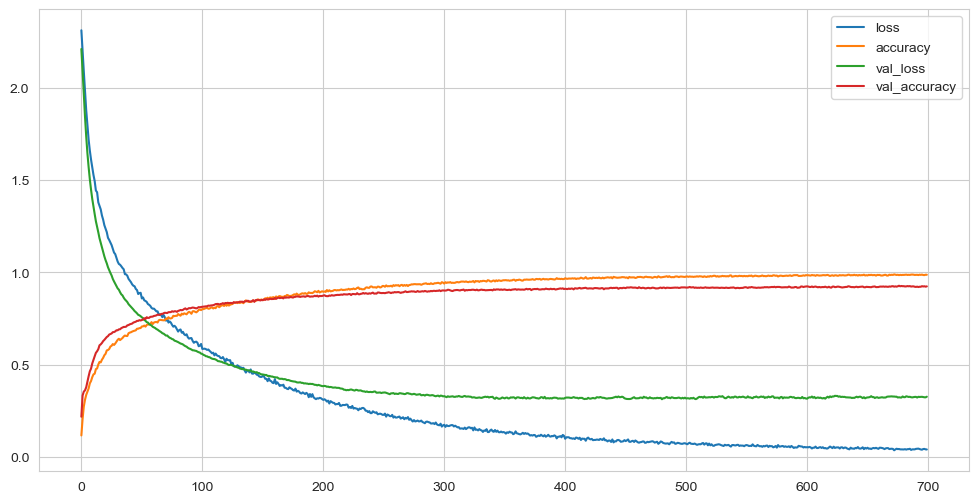

In [49]:
plotHistory(model_3_history)

In [50]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              59392     
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)              

Epoch 45/500
55/55 [==============================] - 1s 11ms/step - loss: 0.1005 - accuracy: 0.9735 - val_loss: 0.4667 - val_accuracy: 0.9105
Epoch 46/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0979 - accuracy: 0.9727 - val_loss: 0.4283 - val_accuracy: 0.9115
Epoch 47/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0979 - accuracy: 0.9734 - val_loss: 0.4174 - val_accuracy: 0.9065
Epoch 48/500
55/55 [==============================] - 1s 11ms/step - loss: 0.1008 - accuracy: 0.9724 - val_loss: 0.3978 - val_accuracy: 0.9135
Epoch 49/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0891 - accuracy: 0.9733 - val_loss: 0.3679 - val_accuracy: 0.9226
Epoch 50/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0904 - accuracy: 0.9761 - val_loss: 0.3639 - val_accuracy: 0.9216
Epoch 51/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0926 - accuracy: 0.9744 - val_loss: 0.4162 - val_accuracy: 0.9146

Epoch 159/500
55/55 [==============================] - 1s 12ms/step - loss: 0.0392 - accuracy: 0.9898 - val_loss: 0.5265 - val_accuracy: 0.9343
Epoch 160/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0454 - accuracy: 0.9900 - val_loss: 0.5464 - val_accuracy: 0.9312
Epoch 161/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0508 - accuracy: 0.9904 - val_loss: 0.5621 - val_accuracy: 0.9353
Epoch 162/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0612 - accuracy: 0.9901 - val_loss: 0.5693 - val_accuracy: 0.9257
Epoch 163/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0558 - accuracy: 0.9900 - val_loss: 0.5855 - val_accuracy: 0.9307
Epoch 164/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0523 - accuracy: 0.9893 - val_loss: 0.6172 - val_accuracy: 0.9333
Epoch 165/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0540 - accuracy: 0.9906 - val_loss: 0.5348 - val_accuracy:

Epoch 216/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0362 - accuracy: 0.9924 - val_loss: 0.6536 - val_accuracy: 0.9252
Epoch 217/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0378 - accuracy: 0.9934 - val_loss: 0.7612 - val_accuracy: 0.9257
Epoch 218/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0491 - accuracy: 0.9916 - val_loss: 0.7357 - val_accuracy: 0.9242
Epoch 219/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0464 - accuracy: 0.9913 - val_loss: 0.7365 - val_accuracy: 0.9216
Epoch 220/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0482 - accuracy: 0.9913 - val_loss: 0.6621 - val_accuracy: 0.9287
Epoch 221/500
55/55 [==============================] - 1s 12ms/step - loss: 0.0360 - accuracy: 0.9939 - val_loss: 0.6542 - val_accuracy: 0.9297
Epoch 222/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0352 - accuracy: 0.9921 - val_loss: 0.7189 - val_accuracy:

Epoch 273/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0481 - accuracy: 0.9897 - val_loss: 0.5988 - val_accuracy: 0.9328
Epoch 274/500
55/55 [==============================] - 1s 12ms/step - loss: 0.0372 - accuracy: 0.9930 - val_loss: 0.6656 - val_accuracy: 0.9312
Epoch 275/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0342 - accuracy: 0.9940 - val_loss: 0.7956 - val_accuracy: 0.9307
Epoch 276/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0567 - accuracy: 0.9926 - val_loss: 0.6400 - val_accuracy: 0.9358
Epoch 277/500
55/55 [==============================] - 1s 12ms/step - loss: 0.0603 - accuracy: 0.9911 - val_loss: 0.5998 - val_accuracy: 0.9353
Epoch 278/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0401 - accuracy: 0.9927 - val_loss: 0.6491 - val_accuracy: 0.9343
Epoch 279/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0449 - accuracy: 0.9916 - val_loss: 0.6996 - val_accuracy:

Epoch 330/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0649 - accuracy: 0.9923 - val_loss: 0.8389 - val_accuracy: 0.9323
Epoch 331/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0380 - accuracy: 0.9939 - val_loss: 0.8694 - val_accuracy: 0.9257
Epoch 332/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0343 - accuracy: 0.9927 - val_loss: 0.7670 - val_accuracy: 0.9287
Epoch 333/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0488 - accuracy: 0.9934 - val_loss: 0.6990 - val_accuracy: 0.9338
Epoch 334/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0512 - accuracy: 0.9936 - val_loss: 0.6340 - val_accuracy: 0.9297
Epoch 335/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0323 - accuracy: 0.9946 - val_loss: 0.7204 - val_accuracy: 0.9307
Epoch 336/500
55/55 [==============================] - 1s 10ms/step - loss: 0.0292 - accuracy: 0.9947 - val_loss: 0.8112 - val_accuracy:

Epoch 387/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0398 - accuracy: 0.9934 - val_loss: 0.7413 - val_accuracy: 0.9317
Epoch 388/500
55/55 [==============================] - 1s 12ms/step - loss: 0.0467 - accuracy: 0.9937 - val_loss: 0.8637 - val_accuracy: 0.9323
Epoch 389/500
55/55 [==============================] - 1s 12ms/step - loss: 0.0286 - accuracy: 0.9956 - val_loss: 0.8701 - val_accuracy: 0.9338
Epoch 390/500
55/55 [==============================] - 1s 12ms/step - loss: 0.0209 - accuracy: 0.9950 - val_loss: 0.9277 - val_accuracy: 0.9333
Epoch 391/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0381 - accuracy: 0.9944 - val_loss: 0.8235 - val_accuracy: 0.9317
Epoch 392/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0346 - accuracy: 0.9944 - val_loss: 0.9318 - val_accuracy: 0.9297
Epoch 393/500
55/55 [==============================] - 1s 11ms/step - loss: 0.0299 - accuracy: 0.9941 - val_loss: 0.9712 - val_accuracy:

Max. Validation Accuracy 0.9403437972068787


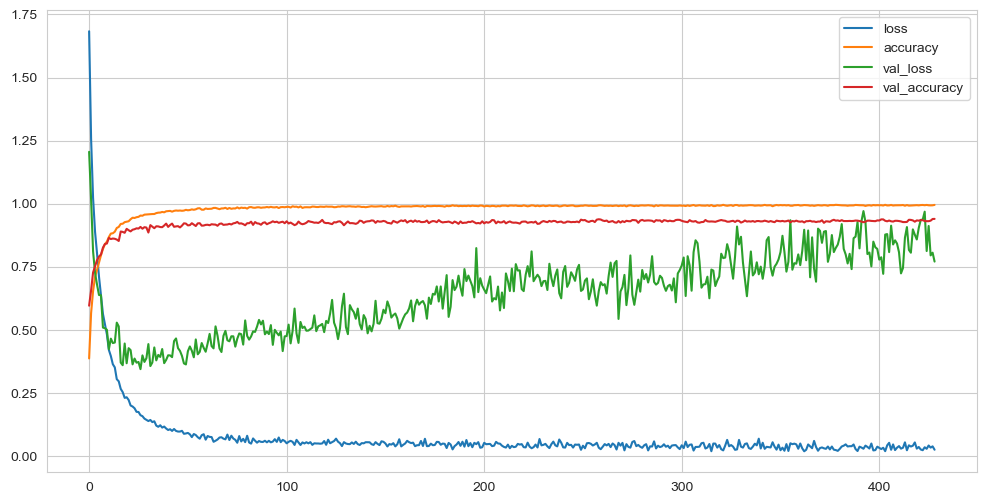

In [51]:
plotHistory(model_4_history)

# Model Evaluation

In [52]:
test_loss, test_acc  = model_4.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

8/8 [==============================] - 0s 4ms/step - loss: 0.9043 - accuracy: 0.9303
The test Loss is : 0.9042606353759766

The Best test Accuracy is : 93.0323839187622


# Saving the model

In [53]:
model_4.save('model_4_complete.h5') 

In [204]:

model = load_model('model_4_complete.h5')

In [224]:
import joblib
from tensorflow.keras.models import load_model

sample_index = random.randint(0, len(X_test) - 1)
sample = X_test.iloc[sample_index:sample_index+1]  # Selects a single row
prediction = model.predict(sample)
predicted_genre_index = np.argmax(prediction)
index_to_genre = {0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}
predicted_genre = index_to_genre[predicted_genre_index]

actual_genre_label = y_test.iloc[sample_index] if isinstance(y_test, pd.Series) else y_test[sample_index]
actual_genre = index_to_genre[actual_genre_label]

print(f"The predicted genre is: {predicted_genre}")
print(f"The actual genre is: {actual_genre}")


1/1 [==============================] - 0s 18ms/step
The predicted genre is: reggae
The actual genre is: reggae


In [232]:
import joblib
from tensorflow.keras.models import load_model
import random

# Load your model and scaler
model = load_model('model_4_complete.h5')


sample_index = random.randint(0, len(X_test) - 1)
sample = X_test.iloc[sample_index:sample_index+1]

# Predict the genre
prediction = model.predict(sample)
predicted_genre_index = np.argmax(prediction)
index_to_genre = {0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}
predicted_genre = index_to_genre[predicted_genre_index]
actual_genre_label = y_test.iloc[sample_index]
actual_genre = index_to_genre[actual_genre_label]
filename = df.loc[X_test.index[sample_index], 'filename']

parts = filename.split('.')
adjusted_filename = '.'.join(parts[:2]) + '.wav'


base_path = r'C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\First_part\genres_combined'

audio_fp = os.path.join(base_path, adjusted_filename)
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)


print(f"The predicted genre is: {predicted_genre}")
print(f"The actual genre is: {actual_genre}")
print(f"Original Filename: {filename}")
# print(f"Adjusted Filename: {adjusted_filename}")
ipd.Audio(data=audio_data, rate=sr)


1/1 [==============================] - 0s 78ms/step
The predicted genre is: rock
The actual genre is: rock
Original Filename: blues.00038.5.wav


# ****************************************************************************************

# Mood recommendation

# ****************************************************************************************

Model loaded and ready!

Original image is labeled as 'happy' for testing.

1/1 [==============================] - 0s 100ms/step
Model prediction is: happy 



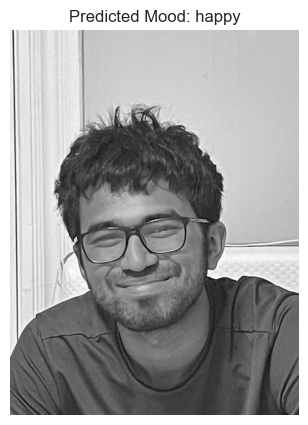

Recommended Genres:  Pop, Disco
Keep the good vibes going with Pop or Disco!


In [251]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the model
with open(r'C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\emotiondetector.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)
model.load_weights(r'C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\emotiondetector.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model loaded and ready!\n")

# Function to process images
def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshape the array for model input
    return feature / 255.0

# Define labels for predictions
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Define mood to genre mapping and messages
mood_genre_mapping = {
    'angry': ['Metal', 'Rock'],
    'disgust': ['Metal', 'Rock'],
    'fear': ['Jazz', 'Metal'],
    'happy': ['Pop', 'Disco'],
    'neutral': ['Jazz', 'Classical'],
    'sad': ['Blues', 'Classical'],
    'surprise': ['Reggae', 'Hiphop']
}

mood_messages = {
    'angry': "Channel your fire with some Metal or Rock.",
    'disgust': "Shake off your disdain with powerful Metal or Rock.",
    'fear': "Embrace the complexity with Jazz or Metal.",
    'happy': "Keep the good vibes going with Pop or Disco!",
    'neutral': "Stay relaxed with the smooth sounds of Jazz or the classics.",
    'sad': "Find solace in the deep tones of Blues or the soothing Classical music.",
    'surprise': "Enjoy the unexpected with some Reggae or Hiphop."
}

# Load and predict an image
image_path = r"C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\images\train\happy\live_test2.jpg"
print("Original image is labeled as 'happy' for testing.\n")
img = ef(image_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label, "\n")

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(load_img(image_path, color_mode='grayscale'), cmap='gray')
plt.title(f'Predicted Mood: {pred_label}')
plt.axis('off')
plt.show()

# Recommend music genres based on the mood
recommended_genres = mood_genre_mapping.get(pred_label, [])
message = mood_messages.get(pred_label, "Explore your music taste!")

# Print the recommendations and message
print("Recommended Genres: ", ', '.join(recommended_genres))
print(message)


Original image is labeled as 'sad' for testing.

1/1 [==============================] - 0s 33ms/step
Model prediction is: neutral 



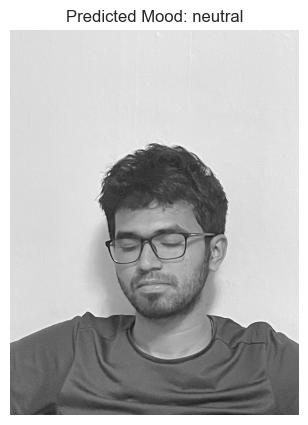

Recommended Genres:  Jazz, Classical
Stay relaxed with the smooth sounds of Jazz or the classics.


In [278]:
image_path = r"C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\images\train\sad\live_sad.jpg"
print("Original image is labeled as 'sad' for testing.\n")
img = ef(image_path)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label, "\n")

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(load_img(image_path, color_mode='grayscale'), cmap='gray')
plt.title(f'Predicted Mood: {pred_label}')
plt.axis('off')
plt.show()

# Recommend music genres based on the mood
recommended_genres = mood_genre_mapping.get(pred_label, [])
message = mood_messages.get(pred_label, "Explore your music taste!")

# Print the recommendations and message
print("Recommended Genres: ", ', '.join(recommended_genres))
print(message)

# ****************************************************************************************

# Recommender Systems

# ****************************************************************************************

In [256]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

In [268]:
# data = pd.read_csv(r'C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\First_part\features_30_sec.csv')
data = pd.read_csv(r'C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\First_part\features_30_sec.csv', index_col='filename')

labels = data[['label']]
data = data.drop(columns=['length','label'])
data.head()

data_scaled=preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))

Scaled data type: <class 'numpy.ndarray'>


In [269]:
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head()

Similarity shape: (1000, 1000)


filename         blues.00000.wav  blues.00001.wav  blues.00002.wav  \
filename                                                             
blues.00000.wav         1.000000         0.049231         0.589618   
blues.00001.wav         0.049231         1.000000        -0.096834   
blues.00002.wav         0.589618        -0.096834         1.000000   
blues.00003.wav         0.284862         0.520903         0.210411   
blues.00004.wav         0.025561         0.080749         0.400266   

filename         blues.00003.wav  blues.00004.wav  blues.00005.wav  \
filename                                                             
blues.00000.wav         0.284862         0.025561        -0.346688   
blues.00001.wav         0.520903         0.080749         0.307856   
blues.00002.wav         0.210411         0.400266        -0.082019   
blues.00003.wav         1.000000         0.126437         0.134796   
blues.00004.wav         0.126437         1.000000         0.556066   

filename         blues.00006.wav  blues.00007.wav  blues.00008.wav  \
filename                                                             
blues.00000.wav        -0.219483        -0.167626         0.641877   
blues.00001.wav         0.318286         0.415258         0.120649   
blues.00002.wav        -0.028061         0.104446         0.468113   
blues.00003.wav         0.300746         0.324566         0.352758   
blues.00004.wav         0.482195         0.623455         0.029703   

filename         blues.00009.wav  ...  rock.00090.wav  rock.00091.wav  \
filename                          ...                                   
blues.00000.wav        -0.097889  ...       -0.082829        0.546169   
blues.00001.wav         0.404168  ...       -0.098111       -0.325126   
blues.00002.wav        -0.132532  ...       -0.032408        0.561074   
blues.00003.wav         0.295184  ...       -0.320107       -0.206516   
blues.00004.wav         0.471657  ...        0.087605        0.017366   

filename         rock.00092.wav  rock.00093.wav  rock.00094.wav  \
filename                                                          
blues.00000.wav        0.578558        0.662590        0.571629   
blues.00001.wav       -0.370792       -0.191698       -0.330834   
blues.00002.wav        0.590779        0.583293        0.514537   
blues.00003.wav       -0.151132        0.041986       -0.172515   
blues.00004.wav        0.138035        0.104684       -0.034594   

filename         rock.00095.wav  rock.00096.wav  rock.00097.wav  \
filename                                                          
blues.00000.wav        0.610942        0.640835        0.496294   
blues.00001.wav       -0.077301       -0.222119       -0.302573   
blues.00002.wav        0.495707        0.566837        0.589983   
blues.00003.wav       -0.000287        0.020515       -0.107821   
blues.00004.wav        0.063454        0.063546        0.172944   

filename         rock.00098.wav  rock.00099.wav  
filename                                         
blues.00000.wav        0.284958        0.304098  
blues.00001.wav        0.499562        0.311723  
blues.00002.wav        0.216378        0.321069  
blues.00003.wav        0.502279        0.183210  
blues.00004.wav        0.153192        0.061785  

[5 rows x 1000 columns]

In [276]:
def find_similar_songs(name):
    series = sim_df_names[name].sort_values(ascending = False)
    series = series.drop(name)
    print("\n*******\nSimilar songs to ", name)
    print(series.head(5))

find_similar_songs('pop.00019.wav') 
ipd.Audio(r'C:\Users\sanje\Documents\WPI_Sem_2_Docs\Machine  Learning\Final project\First_part\genres_combined\pop.00019.wav')


*******
Similar songs to  pop.00019.wav
filename
pop.00023.wav    0.862836
pop.00034.wav    0.860499
pop.00078.wav    0.829135
pop.00088.wav    0.824456
pop.00091.wav    0.802269
Name: pop.00019.wav, dtype: float64
